In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import re

In [17]:
df1=pd.read_csv("Time_series_analysis_and_forecast_DATASET.csv")
df1.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [18]:
df1.shape

(92016, 5)

In [19]:
from prophet import Prophet

In [20]:
df1["Date"]=df1["FullDate"].str.extract("(\d{4}-\d{2}-\d{2})")
df1["Date"]

0        2010-09-01
1        2010-09-01
2        2010-09-01
3        2010-09-01
4        2010-09-01
            ...    
92011    2021-02-28
92012    2021-02-28
92013    2021-02-28
92014    2021-02-28
92015    2021-02-28
Name: Date, Length: 92016, dtype: object

In [21]:
df1

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice,Date
0,2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710,2010-09-01
1,2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635,2010-09-01
2,2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565,2010-09-01
3,2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910,2010-09-01
4,2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030,2010-09-01
...,...,...,...,...,...,...
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925,2021-02-28
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880,2021-02-28
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060,2021-02-28
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000,2021-02-28


In [22]:
df2=df1.groupby(["Date"]).agg({"ElecPrice":sum})
df2.reset_index(inplace=True)
df2=df2.rename(columns={"Date":"ds", "ElecPrice":"y"})
df2

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555
...,...,...
3829,2021-02-24,634.770
3830,2021-02-25,577.515
3831,2021-02-26,1445.495
3832,2021-02-27,488.980


In [23]:
df3=df2[:2757]
df3

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555
...,...,...
2752,2018-03-15,2717.340
2753,2018-03-16,2277.335
2754,2018-03-17,1718.385
2755,2018-03-18,1088.015


In [24]:
df4=df2[2757:]
df4

,ds,y
2757,2018-03-20,1833.000
2758,2018-03-21,1730.490
2759,2018-03-22,2260.550
2760,2018-03-23,2138.760
2761,2018-03-24,1721.700
...,...,...
3829,2021-02-24,634.770
3830,2021-02-25,577.515
3831,2021-02-26,1445.495
3832,2021-02-27,488.980


In [25]:
model=Prophet()
model.fit(df3)

23:49:31 - cmdstanpy - INFO - Chain [1] start processing
23:49:31 - cmdstanpy - INFO - Chain [1] done processing
23:49:31 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 
Optimization terminated abnormally. Falling back to Newton.
23:49:31 - cmdstanpy - INFO - Chain [1] start processing
23:49:31 - cmdstanpy - INFO - Chain [1] done processing
23:49:31 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 


RuntimeError: Error during optimization! Command 'C:\Users\USER\anaconda3\Lib\site-packages\prophet\stan_model\prophet_model.bin random seed=50658 data file=C:\Users\USER\AppData\Local\Temp\tmpw42vmxc5\_qxtb72d.json init=C:\Users\USER\AppData\Local\Temp\tmpw42vmxc5\kirjc275.json output file=C:\Users\USER\AppData\Local\Temp\tmpw42vmxc5\prophet_modeliyvtxynm\prophet_model-20230131234931.csv method=optimize algorithm=newton iter=10000' failed: 

In [26]:
df1["FullDate"]=pd.to_datetime(df1["FullDate"])

In [27]:
df1_copy=df1.set_index("FullDate")
df1_copy

,Tmax,SysLoad,GasPrice,ElecPrice,Date
FullDate,,,,,
2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710,2010-09-01
2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635,2010-09-01
2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565,2010-09-01
2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910,2010-09-01
2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030,2010-09-01
...,...,...,...,...,...
2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925,2021-02-28
2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880,2021-02-28
2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060,2021-02-28


In [28]:
df1_daily=df1_copy.resample("D").mean()

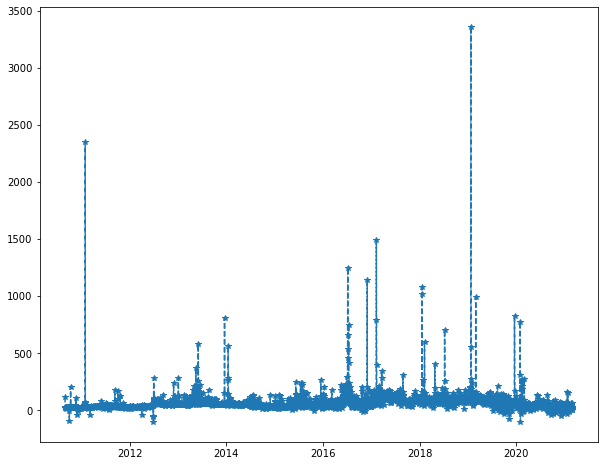

In [29]:
plt.figure(figsize=(10,8))
plt.plot(df1_daily.index, df1_daily.ElecPrice, "--", marker="*" )

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
adf_results = adfuller(df1_daily["SysLoad"])
print(f'ADF Statistic:{adf_results[0]}')
print(f'p-value:{adf_results[1]}')
print(f'No. of lags used:{adf_results[2]}')
print(f'No. of observations used:{adf_results[3]}')
print('Critical values:')
for k,v in adf_results[4].items():
    print(f'{k}:{v}')

In [ ]:
adf_results = adfuller(df1_daily["GasPrice"])
print(f'ADF Statistic:{adf_results[0]}')
print(f'p-value:{adf_results[1]}')
print(f'No. of lags used:{adf_results[2]}')
print(f'No. of observations used:{adf_results[3]}')
print('Critical values:')
for k,v in adf_results[4].items():
    print(f'{k}:{v}')